# Intégration de fonction à une variable

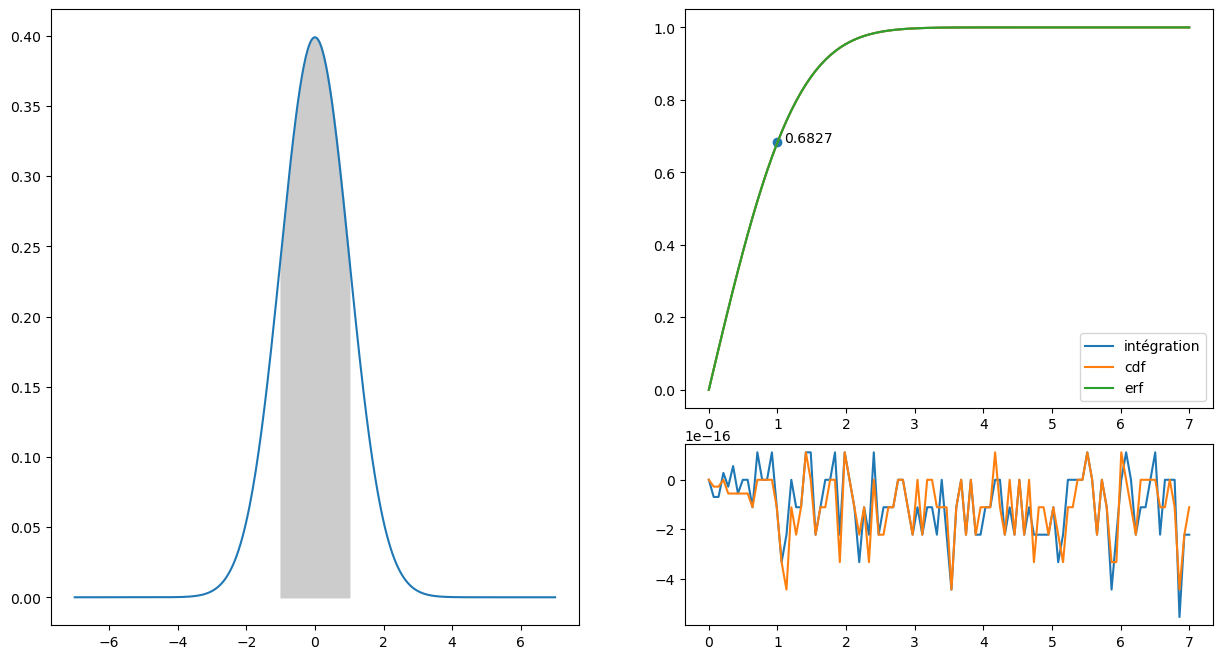

In [26]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
import scipy.optimize as optimize
import scipy.integrate as integrate
import scipy.special as special


"""
Intégrale d'une fonction gaussienne normalisée entre -x et x (donne donc l'intervalle de confiance associé)
par :
- intégration explicite
- utilisation de la fonction de distribution cumulative 
- utilisation de la fonction erf

Le graphique de droite correspond au calcul de l'intégrale avec des bornes variables
"""

# Programme principal
if __name__ == "__main__":
    xs = np.linspace(0, 7, 100)
    xs2 = np.linspace(-7, 7, 500)

    xs3 = np.linspace(-1, 1, 2**8)

    # fonction gaussienne
    normal = lambda z: stats.norm.pdf(z, loc=0, scale=1)

    # tracé de la gaussienne
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(3, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    ax1.plot(xs2, normal(xs2))
    # tracée de la zone grisée
    ax1.fill_between(xs3, normal(xs3), color="#cccccc")

    # calcul par intégration explicite
    confidence_intervals = []
    for x in xs:
        # intégration entre -x et x
        # la fonction retourne en premier argument l'intégrale et en deuxième une estimation de l'erreur sur l'intégrale
        integral, error = integrate.quad(normal, -x, x)
        confidence_intervals.append(integral)

    # tracé de l'intégration
    ax2 = fig.add_subplot(gs[0:2, 1])

    # résultat de l'intégration
    ax2.plot(xs, confidence_intervals, label="intégration")

    # calcul explicite de l'intégrale avec la fonction de distribution cumulative
    confidence_intervals_cdf = stats.norm.cdf(xs, loc=0, scale=1) - stats.norm.cdf(
        -xs, loc=0, scale=1
    )
    ax2.plot(xs, confidence_intervals_cdf, label="cdf")

    # Ajout du point indiquant la valeur correspondant à l'intégrale grise calculée
    prob1sigma = stats.norm.cdf(1, loc=0, scale=1) - stats.norm.cdf(-1, loc=0, scale=1)
    ax2.scatter([1], [prob1sigma])
    ax2.text(1.1, prob1sigma, "{:.4f}".format(prob1sigma))

    # utilisation de la fonction erf, le facteur np.sqrt(2)
    # est là pour corriger les facteurs utilisés dans les expressions des formes classiques de special.erf vs stats.norm
    confidence_intervals_erf = special.erf(xs / np.sqrt(2))
    ax2.plot(xs, confidence_intervals_erf, label="erf")

    ax2.legend()

    # tracé de l'écart entre les différentes valeurs calculées
    ax3 = fig.add_subplot(gs[2, 1])
    ax3.plot(xs, confidence_intervals_cdf - confidence_intervals, label="cdf")
    ax3.plot(xs, confidence_intervals_erf - confidence_intervals, label="erf")
    plt.show()